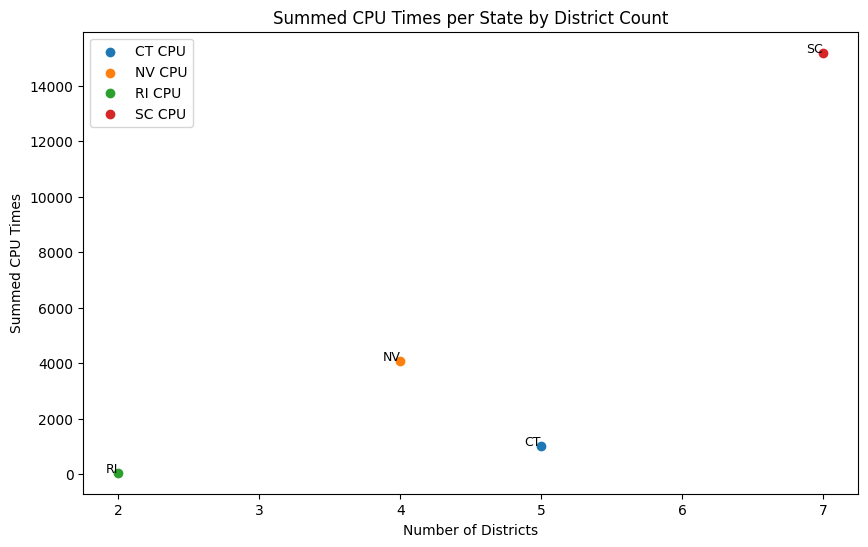

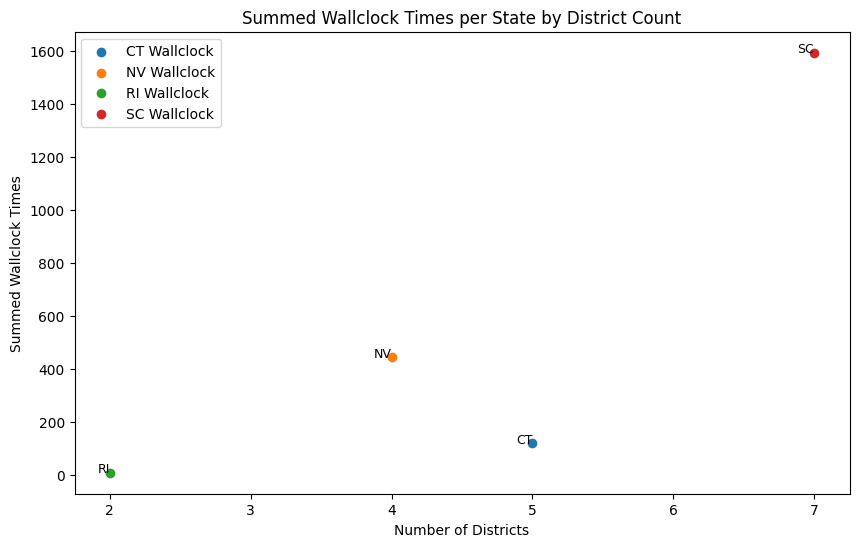

In [2]:
import matplotlib.pyplot as plt

ct_wallclock_times = [35.54, 63.66, 15.07, 4.16] # 5 districts
nv_wallclock_times = [30.73, 233.16, 180.96] # 4 districts
ri_wallclock_times = [7.42] # 2 districts
sc_wallclock_times = [424.59, 386.69, 339.62, 295.06, 137.37, 11.31] # 7 districts

ct_cpu_times = [298.41, 593.05, 115.20, 21.26] # 5 districts
nv_cpu_times = [129.99, 2164.14, 1796.11] # 4 districts
ri_cpu_times = [49.61] # 2 districts
sc_cpu_times = [4095.83, 3635.03, 3175.68, 2948.45, 1265.69, 76.01] # 7 districts

# Summing the times
wallclock_sums = [sum(ct_wallclock_times), sum(nv_wallclock_times), sum(ri_wallclock_times), sum(sc_wallclock_times)]
cpu_sums = [sum(ct_cpu_times), sum(nv_cpu_times), sum(ri_cpu_times), sum(sc_cpu_times)]

# Number of districts
districts = [5, 4, 2, 7]

# Labels for the points
labels = ['CT', 'NV', 'RI', 'SC']

# CPU
plt.figure(figsize=(10, 6))
for i in range(len(districts)):
    plt.scatter(districts[i], cpu_sums[i], label=f"{labels[i]} CPU")
    plt.text(districts[i], cpu_sums[i], f"{labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Summed CPU Times')
plt.title('Summed CPU Times per State by District Count')
plt.legend()
plt.show()

# Wallclock
plt.figure(figsize=(10, 6))
for i in range(len(districts)):
    plt.scatter(districts[i], wallclock_sums[i], label=f"{labels[i]} Wallclock")
    plt.text(districts[i], wallclock_sums[i], f"{labels[i]}", fontsize=9, ha='right')
plt.xlabel('Number of Districts')
plt.ylabel('Summed Wallclock Times')
plt.title('Summed Wallclock Times per State by District Count')
plt.legend()
plt.show()